## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm, lognorm, uniform

import warnings
# warnings.filterwarnings('ignore')

In [2]:
print("Yfinance version: " , yf.__version__)

Yfinance version:  0.2.37


In [3]:
# Set default parameters for plt.title()
plt.rcParams['axes.titlepad'] = 12  # Set padding around the title
plt.rcParams['axes.titleweight'] = 'normal'  # Set title font size
plt.rcParams['axes.titlesize'] = 9  # Set title font size

## Fetch data

In [4]:
def fetch_stock_data(tickers, start_date, end_date, interval):
    data = yf.download(tickers, start=start_date, end=end_date, interval=interval)
    return data

In [5]:
# select tickers
tickers = ["GOOG", "IAU", "MSFT", "BRK-B"] #, "BRK-B", "IAU", "GOOG", "AMZN", "AAPL", "TSM", "BAC", "WFC"]  #VALE, KO, JNJ, DG, DIS, SPY 

# date format YYYY-MM-DD
start_date = "2010-01-01"
end_date = "2024-02-01"

# time interval to take the cotations, in this case monthly
interval= "1d"

stock_data = fetch_stock_data(tickers, start_date, end_date, interval)

display(stock_data)

[*********************100%%**********************]  4 of 4 completed


Price        Adj Close                                          Close  \
Ticker           BRK-B        GOOG        IAU        MSFT       BRK-B   
Date                                                                    
2010-01-04   66.220001   15.610239  21.978001   23.431585   66.220001   
2010-01-05   66.540001   15.541497  21.954000   23.439159   66.540001   
2010-01-06   66.199997   15.149715  22.326000   23.295319   66.199997   
2010-01-07   66.459999   14.797037  22.181999   23.053049   66.459999   
2010-01-08   66.440002   14.994298  22.290001   23.212032   66.440002   
...                ...         ...        ...         ...         ...   
2024-01-25  380.850006  153.639999  38.230000  404.122681  380.850006   
2024-01-26  385.399994  153.789993  38.180000  403.184418  385.399994   
2024-01-29  383.179993  154.839996  38.459999  408.963715  383.179993   
2024-01-30  387.149994  153.050003  38.509998  407.835815  387.149994   
2024-01-31  383.739990  141.800003  38.490002  396.846130  383.739990   

Price                                                High              ...  \
Ticker            GOOG        IAU        MSFT       BRK-B        GOOG  ...   
Date                                                                   ...   
2010-01-04   15.610239  21.978001   30.950001   66.500000   15.678981  ...   
2010-01-05   15.541497  21.954000   30.959999   66.589996   15.637387  ...   
2010-01-06   15.149715  22.326000   30.770000   66.500000   15.588072  ...   
2010-01-07   14.797037  22.181999   30.450001   66.510002   15.193053  ...   
2010-01-08   14.994298  22.290001   30.660000   66.480003   15.024933  ...   
...                ...        ...         ...         ...         ...  ...   
2024-01-25  153.639999  38.230000  404.869995  380.989990  154.759995  ...   
2024-01-26  153.789993  38.180000  403.929993  385.730011  154.110001  ...   
2024-01-29  154.839996  38.459999  409.720001  385.700012  155.199997  ...   
2024-01-30  153.050003  38.509998  408.589996  387.640015  155.039993  ...   
2024-01-31  141.800003  38.490002  397.579987  387.920013  145.589996  ...   

Price             Low                    Open                         \
Ticker            IAU        MSFT       BRK-B        GOOG        IAU   
Date                                                                   
2010-01-04  21.882000   30.590000   66.000000   15.615220  21.978001   
2010-01-05  21.870001   30.639999   66.389999   15.620949  21.988001   
2010-01-06  22.110001   30.520000   66.500000   15.588072  22.156000   
2010-01-07  22.152000   30.190001   66.199997   15.178109  22.230000   
2010-01-08  22.077999   30.240000   66.480003   14.744733  22.306000   
...               ...         ...         ...         ...        ...   
2024-01-25  38.080002  402.529999  379.239990  151.740005  38.270000   
2024-01-26  38.139999  402.429993  381.049988  152.869995  38.250000   
2024-01-29  38.240002  404.329987  385.489990  153.639999  38.459999   
2024-01-30  38.389999  406.450012  383.239990  154.009995  38.740002   
2024-01-31  38.419998  397.209991  386.529999  145.389999  38.669998   

Price                    Volume                                
Ticker            MSFT    BRK-B       GOOG      IAU      MSFT  
Date                                                           
2010-01-04   30.620001  1575000   78541293  1185000  38409100  
2010-01-05   30.850000  1310000  120638494   936000  49749600  
2010-01-06   30.879999  1760000  159744526  1091000  58182400  
2010-01-07   30.629999  1505000  257533695   811500  50559700  
2010-01-08   30.280001  1500000  189680313   737000  51197400  
...                ...      ...        ...      ...       ...  
2024-01-25  404.320007  4055800   21495100  4637800  21021200  
2024-01-26  404.369995  3621400   19494500  3288100  17803300  
2024-01-29  406.059998  3797400   20909300  3503900  24510200  
2024-01-30  412.260010  3090900   26578900  4125600  33477600  
2024-01-31  406.959991  3856400   43908600 

In [6]:
# select only the closing price
df_close = stock_data.Close.copy()
# df_close.info()
df_close.head(3)

Ticker,BRK-B,GOOG,IAU,MSFT
Date,,,,
2010-01-04,66.220001,15.610239,21.978001,30.950001
2010-01-05,66.540001,15.541497,21.954000,30.959999
2010-01-06,66.199997,15.149715,22.326000,30.770000


In [7]:
# find the 
df_daily_return = (df_close
                   .copy()
                   .pct_change(periods=1)
                   .dropna()
)

# display(cov_yoy.describe())
df_daily_return.head(3)

Ticker,BRK-B,GOOG,IAU,MSFT
Date,,,,
2010-01-05,0.004832,-0.004404,-0.001092,0.000323
2010-01-06,-0.005110,-0.025209,0.016945,-0.006137
2010-01-07,0.003928,-0.023280,-0.006450,-0.010400


## Covariance

### Calculation (YoY)

In [8]:
# find the 
cov_yoy = (df_close
             .copy()
             .pct_change(periods=1)
             .dropna()
             .rolling(window=252)
             .cov()
             .dropna()
             .apply(lambda x: 252 * x)
)

# display(cov_yoy.describe())
cov_yoy

Ticker                BRK-B      GOOG       IAU      MSFT
Date       Ticker                                        
2011-01-03 BRK-B   0.053128  0.027957  0.001466  0.019899
           GOOG    0.027957  0.077881  0.004517  0.031771
           IAU     0.001466  0.004517  0.027043  0.003060
           MSFT    0.019899  0.031771  0.003060  0.047945
2011-01-04 BRK-B   0.053127  0.027989  0.001567  0.019880
...                     ...       ...       ...       ...
2024-01-30 MSFT    0.007005  0.035750  0.000949  0.056846
2024-01-31 BRK-B   0.018303  0.013296 -0.002003  0.007122
           GOOG    0.013296  0.092002 -0.000423  0.037240
           IAU    -0.002003 -0.000423  0.017211  0.000893
           MSFT    0.007122  0.037240  0.000893  0.057112

[13164 rows x 4 columns]

In [9]:
cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,GOOG,IAU,MSFT
Date,Ticker,,,,
2011-01-03,GOOG,0.027957,0.077881,0.004517,0.031771
2011-01-04,GOOG,0.027989,0.077876,0.004598,0.031758
2011-01-05,GOOG,0.027933,0.077365,0.004963,0.031576


In [10]:
cov11 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
cov12 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# cov21 = cov12
cov22 = cov_yoy[(cov_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

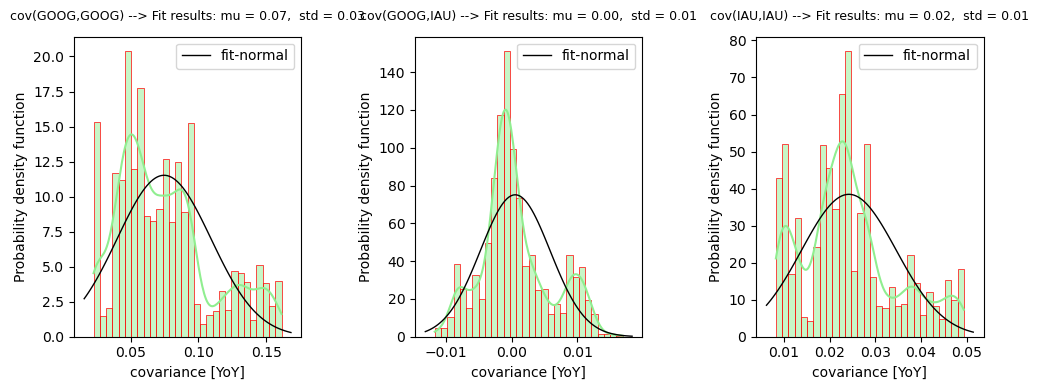

In [11]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 1)
mu, std = norm.fit(cov11)
sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(cov12)
sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY covariance
plt.subplot(1, 3, 3)
mu, std = norm.fit(cov22)
sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("covariance [YoY]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


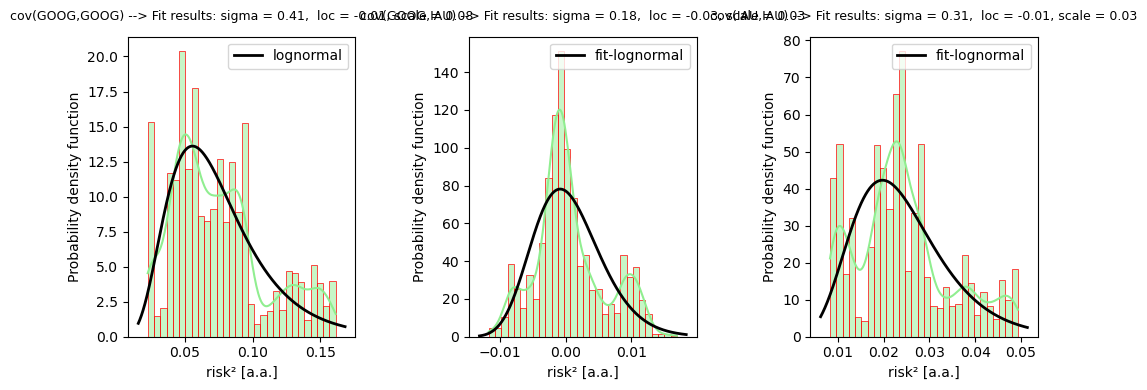

In [12]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 1)
sigma, loc, scale = lognorm.fit(cov11)

sns.histplot(data= cov11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()


# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(cov12)

sns.histplot(data= cov12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

# Fit a Lognormal distribution to theYoY covariance
plt.subplot(1, 3, 3)
sigma, loc, scale = lognorm.fit(cov22)

sns.histplot(data= cov22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"cov({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("risk² [a.a.]")
plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Correlation

### Calculation (YoY)

In [13]:
# find the covelation yoy
corr_yoy = (df_close
            .copy()
            .pct_change(periods=1)
            .dropna()
            .rolling(window=252)
            .corr()
            .dropna()
            # .apply(lambda x: x + 1.0)
)

# display(cov_yoy.describe())
corr_yoy

Ticker                BRK-B      GOOG       IAU      MSFT
Date       Ticker                                        
2011-01-03 BRK-B   1.000000  0.434621  0.038690  0.394278
           GOOG    0.434621  1.000000  0.098425  0.519934
           IAU     0.038690  0.098425  1.000000  0.084990
           MSFT    0.394278  0.519934  0.084990  1.000000
2011-01-04 BRK-B   1.000000  0.435137  0.040918  0.393837
...                     ...       ...       ...       ...
2024-01-30 MSFT    0.217437  0.507860  0.030328  1.000000
2024-01-31 BRK-B   1.000000  0.324003 -0.112832  0.220287
           GOOG    0.324003  1.000000 -0.010624  0.513741
           IAU    -0.112832 -0.010624  1.000000  0.028471
           MSFT    0.220287  0.513741  0.028471  1.000000

[13164 rows x 4 columns]

In [14]:
corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])].head(3)

,Ticker,BRK-B,GOOG,IAU,MSFT
Date,Ticker,,,,
2011-01-03,GOOG,0.434621,1.0,0.098425,0.519934
2011-01-04,GOOG,0.435137,1.0,0.099130,0.519646
2011-01-05,GOOG,0.435560,1.0,0.107841,0.518506


In [15]:
corr11 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[0]].values
corr12 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[0])][tickers[1]].values
# corr21 = corr12
corr22 = corr_yoy[(corr_yoy.index.get_level_values('Ticker') == tickers[1])][tickers[1]].values

### Plots

#### Normal:

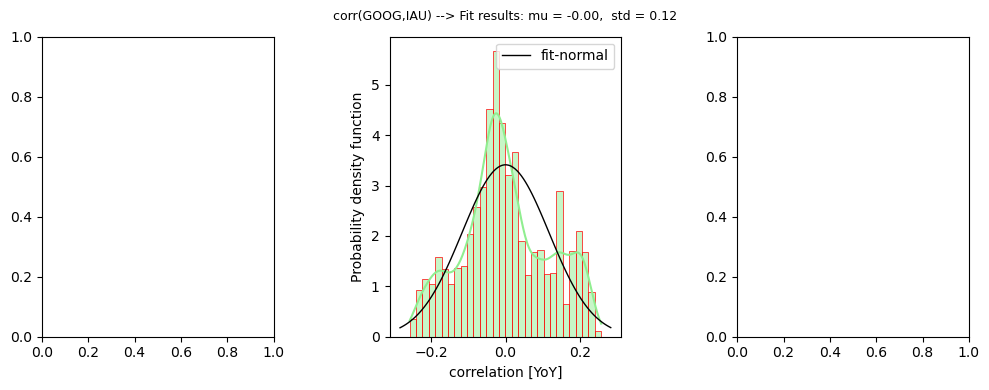

In [16]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 1)
# mu, std = norm.fit(corr11)
# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 2)
mu, std = norm.fit(corr12)
sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Gaussian distribution to the YoY corrariance
plt.subplot(1, 3, 3)
# mu, std = norm.fit(corr22)
# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')

# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', label="fit-normal", linewidth=1)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: mu = %.2f,  std = %.2f" % (mu, std))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

#### Lognormal:

C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


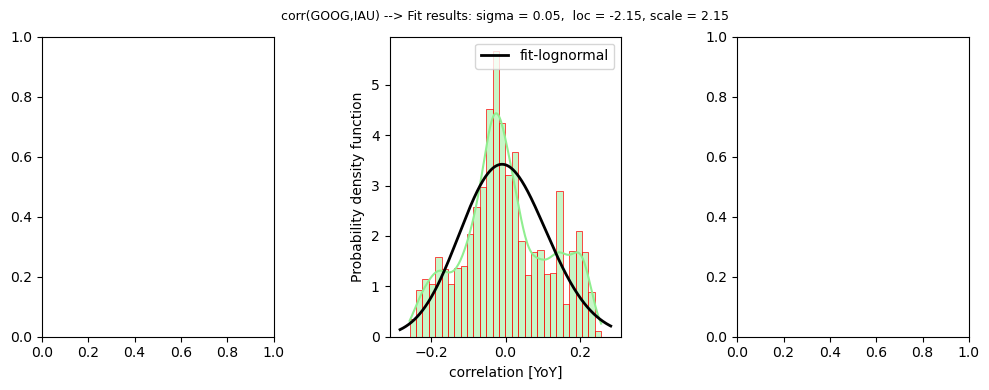

In [17]:
# Plot the histogram of the returns_daily along with the fitted Gaussian distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 1)
# sigma, loc, scale = lognorm.fit(corr11)

# sns.histplot(data= corr11, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"corr({tickers[0]},{tickers[0]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()


# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 2)
sigma, loc, scale = lognorm.fit(corr12)

sns.histplot(data= corr12, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
plt.title(f"corr({tickers[0]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
plt.ylabel("Probability density function")
plt.xlabel("correlation [YoY]")
plt.legend()

# Fit a Lognormal distribution to theYoY corrariance
plt.subplot(1, 3, 3)
# sigma, loc, scale = lognorm.fit(corr22)

# sns.histplot(data= corr22, bins=30, stat="density", kde=True, color='lightgreen', edgecolor='red')
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="fit-lognormal", linewidth=2)
# plt.title(f"corr({tickers[1]},{tickers[1]}) --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
# plt.ylabel("Probability density function")
# plt.xlabel("correlation [YoY]")
# plt.legend()

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)
plt.show()

## Monte carlo simulation

### Equations:
<br>

- **Portfolio Return**:
<br>
$$ \large R_P = {\omega}^T \cdot R $$
<br>
with $R_P$ being the return of the portfolio, $\omega$ the weights and $R$ the returns of the assets. Each one are given by:
<br><br>

<table>
  <tr>
    <td>
      $$
        \large{\omega} = \small \begin{bmatrix}
                {\omega}_A \\
                {\omega}_B \\
                {\omega}_C \\
        \end{bmatrix},
      $$
    </td>
    <td>
      and
    </td>
    <td>
    $$
        \large{R} = \small \begin{bmatrix}
                R_A \\
                R_B \\
                R_C \\
        \end{bmatrix}.
    $$
    </td>
  </tr>
</table>

<br>

- **Portfolio Risk**: 
<br>
$$ \large{{\sigma}^2_P} = {\omega}^T \cdot \Sigma \cdot \omega $$
<br>
in wich ${{\sigma}^2_P}$ is the variance of the portfolio and $\Sigma$ is the covariance matrix of the assets. The covariance matrix is given by:
<br>
<br>
$$ \large{\Sigma} = \small \begin{bmatrix}
                {{\sigma}^2_A} & cov(A,B) & cov(A,C) \\
                cov(A,B) & {{\sigma}^2_B} & cov(B,C) \\
                cov(A,C) & cov(B,C) & {{\sigma}^2_C} \\
            \end{bmatrix}.
$$
<br>
<br>
The weight matrix ${\omega}$ have dimensios of $({n}_{stocks}, {n}_{samples})$, with ${n}_{stocks}$ being the number of stocks in the portfolio and ${n}_{samples}$ the number of samples for data simulation. So, the weight matrix is defined as:
<br>
<br>
$$ \large{\omega} = \small \begin{bmatrix}
                                {{\omega}^{(1)}_1} & {{\omega}^{(1)}_2} & {{\omega}^{(1)}_3} & \cdot \cdot \cdot & {{\omega}^{(1)}_{n_{samples}}} \\
                                {{\omega}^{(2)}_1} & {{\omega}^{(2)}_2} & {{\omega}^{(2)}_3} & \cdot \cdot \cdot & {{\omega}^{(2)}_{n_{samples}}} \\
                                {{\omega}^{(3)}_1} & {{\omega}^{(3)}_2} & {{\omega}^{(3)}_3} & \cdot \cdot \cdot & {{\omega}^{(3)}_{n_{samples}}} \\
                                \cdot              &      \cdot         &         \cdot      &         \cdot     &            \cdot                \\
                                {{\omega}^{(n_{stocks})}_1} & {{\omega}^{(n_{stocks})}_2} & {{\omega}^{(n_{stocks})}_3} & \cdot \cdot \cdot & {{\omega}^{(n_{stocks})}_{n_{samples}}} \\
                    \end{bmatrix}.
$$
<br>


## Generate samples from distributions models - Covariance

#### Cov pairs

In [18]:
# Number of samples
num_samples = 1_000

In [19]:
# Generate all pairs of assets for covariance matrix
def generate_cov_pairs():    
    ticker_pairs1 = [(tickers[i], tickers[j]) for i in range(len(tickers)) for j in range(i, len(tickers))]
    ticker_pairs2 = [(j,i) for i,j in ticker_pairs1]
    pairs = set(ticker_pairs1).union(set(ticker_pairs2))
    
    ticker_map = dict(zip(tickers, range(0, len(tickers))))
    
    return pairs, ticker_map

cov_pairs, ticker_map = generate_cov_pairs()

#### Cov fitting params

In [20]:
# Empty dict to receive the parameters
cov_fitting_params = {}

for i, j in cov_pairs:

    if i == j:
        
        df = (df_daily_return[[i]]
              .copy()
              .rolling(window=252)
              .var()
              .dropna()
              .apply(lambda x: 252 * x)
            )
        
        sigma, loc, scale = lognorm.fit(df)
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}

    else:
        
        df = (df_daily_return[[i,j]]
              .copy()
              .rolling(window=252)
              .cov()
              .dropna()
              .apply(lambda x: 252 * x)
            )
    
        cov_ij = df[(df.index.get_level_values('Ticker') == i)][j]
    
        sigma, loc, scale = lognorm.fit(cov_ij)    
        cov_fitting_params[(i,j)] = {"sigma": sigma, "loc": loc, "scale": scale}
    
# cov_fitting_params


C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
C:\Users\DELL\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


#### Cov samples

In [21]:
def calculate_cov_samples(cvp, num_samples=1_000):
    sigma   = cov_fitting_params[cvp]["sigma"]
    loc     = cov_fitting_params[cvp]["loc"]
    scale   = cov_fitting_params[cvp]["scale"]
    samples = lognorm.rvs(sigma, loc=loc, scale=scale, size=num_samples, random_state=42)
    return samples

In [22]:
# Defining return dict to receive the samples from distributions models builted with their respective parameters
cov_samples_lognormal = { cvp: calculate_cov_samples(cvp, num_samples) for cvp in cov_pairs }

# Reshaping from (num_samples,) --> (num_samples, 1, 1)
cov_samples_reshaped  = { cvp: cov_samples_lognormal[cvp].reshape(num_samples, 1, 1) for cvp in cov_samples_lognormal.keys() }

# Indexes index array to keys with respective samples, ex.: (BRK-B, IAU) --> (0, 1) 
cov_samples_mapped     = {(ticker_map[i], ticker_map[j]): cov_samples_reshaped[(i,j)] for i, j in cov_samples_reshaped.keys() } 


## Build Cov matrix

In [23]:
# Create empty array with the final shape
cov_matrix = np.zeros((num_samples, len(tickers), len(tickers)), dtype=np.float64)

# Map the values in the dictionary to the new array
for (i, j), arr in cov_samples_mapped.items():    
    cov_matrix[:, i, j] = arr[:, 0, 0]


In [24]:
cov_matrix.shape

(1000, 4, 4)

## Generate weights

In [25]:
def make_wight_matrix(n_tickers, n_samples=1000):
    rand_values = uniform.rvs(size= int(n_tickers * n_samples)).reshape((n_tickers, n_samples))
    normalized_values = rand_values / rand_values.sum(axis=0, keepdims=True)
    return normalized_values

# Matrix of the weights
weight_matrix = make_wight_matrix(len(tickers), num_samples)


In [26]:
weight_matrix.shape

(4, 1000)

## Build Risk Matrix

In [27]:
%time risk_total_matrix = np.dot( np.dot( weight_matrix.T, cov_matrix),  weight_matrix)

# Initialize risk_matrix with zeros of shape (num_samples, num_samples)
risk_matrix = np.zeros((num_samples, num_samples))

# Filter only columns with the risks os Markowitz
for i in range(num_samples):
    risk_matrix[:, i] = risk_total_matrix[i, :, i]



CPU times: total: 40.5 s
Wall time: 1min 16s


In [28]:
risk_matrix.shape

(1000, 1000)

In [29]:
# %time a = np.dot( np.dot( weight_matrix.T, cov_matrix),  weight_matrix)

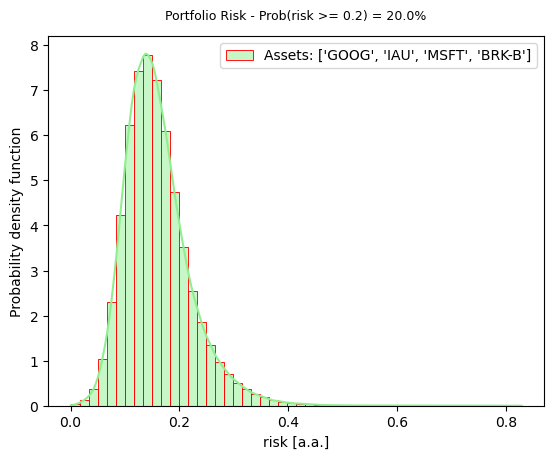

In [30]:
# Fit a Lognormal distribution to the returns_daily (actually, the pricing ratio Pn+12/Pn)
risk_reshaped = risk_matrix.reshape(-1)
data = np.sqrt(risk_reshaped[risk_reshaped >= 0])
# sigma, loc, scale = lognorm.fit(data)

sns.histplot(data= data, bins=50, stat="density", kde=True, color='lightgreen', edgecolor='red', label=f"Assets: {tickers}")
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# pdf = lognorm.pdf(x, sigma, loc= loc, scale= scale)

# plt.plot(x, pdf, 'k', label="lognormal", linewidth=2)
# plt.title(f"Portfolio {tickers} --> Fit results: sigma = %.2f,  loc = %.2f, scale = %.2f" % (sigma, loc, scale))
threshold = 0.2
risk_threshold = np.count_nonzero(data > threshold) / np.max(data.shape)

plt.title(f"Portfolio Risk - Prob(risk >= {threshold}) = {int(100 * risk_threshold)}.0%")
plt.ylabel("Probability density function")
plt.xlabel("risk [a.a.]")
plt.legend()
plt.show()

#### Analise results

In [31]:
## MAP the final values to source values in their respective arrays:
# risk_matrix[i, j] == risk_total_matrix[j, i, j]
# risk_total_matrix[j, i, j] == interm_matrix[j, i, :]  *  weight_matrix[:, j]
# interm_matrix[j, i, :] == weight_matrix.T[j, :]  *  cov_matrix[ i, :, :]

In [32]:
# Find the coordinates (indices) of the minimum value
i, j = np.unravel_index(np.argmin(risk_matrix), risk_matrix.shape)

# Print the coordinates
print("Coordinates of the minimum value:", i, j)
print("Minimum value: ", risk_total_matrix[j, i, j])

Coordinates of the minimum value: 262 482
Minimum value:  -0.004247752875373375


In [33]:
w_T = weight_matrix.T[j, :].reshape(1, 4)
w_T

array([[0.16270618, 0.55134027, 0.11403881, 0.17191474]])

In [34]:
cov = cov_matrix[ i, :, :].reshape(4, 4)
cov

array([[ 0.01088946, -0.01265741,  0.00865656,  0.00060043],
       [-0.01265741,  0.0024357 , -0.01473026, -0.01126529],
       [ 0.00865656, -0.01473026,  0.01555571,  0.00235392],
       [ 0.00060043, -0.01126529,  0.00235392,  0.01126313]])

In [35]:
int_matrix = w_T.dot(cov)
int_matrix

array([[-0.00411635, -0.00433303, -0.00453428, -0.00390857]])

In [36]:
w = weight_matrix[:, j].reshape(4, 1)
w

array([[0.16270618],
       [0.55134027],
       [0.11403881],
       [0.17191474]])

In [37]:
risk_final = int_matrix.dot(w)
risk_final

array([[-0.00424775]])